In [1]:
from smc import SMCsampler
from prior import CatalogPrior
from images import ImageAttributes

import torch
# torch.cuda.is_available()
device = torch.device("cuda:6" if torch.cuda.is_available() else "cpu")
torch.cuda.set_device(device)
torch.set_default_device(device)

In [2]:
num_images = 1
img_dim = 15 # Needs to be square for now
img_width = img_dim
img_height = img_dim
max_objects = 10
psf_stdev = 3.25
background_intensity = 19200

image_attributes = ImageAttributes(img_width = img_width,
                                   img_height = img_height,
                                   max_objects = max_objects,
                                   psf_stdev = psf_stdev,
                                   background_intensity = background_intensity)

true_counts, true_fluxes, true_locs, true_total_intensities, images = image_attributes.generate(num_images)

In [3]:
for i in range(num_images):
    print(f"image {i+1}",
          "\ncount\n", true_counts[i].round().item(),
          "\ntotal flux\n", true_fluxes[i].sum().item(),
          "\nloc\n", true_locs[i].cpu().numpy(), "\n\n")

image 1 
count
 5 
total flux
 320809.5625 
loc
 [[ 0.          0.        ]
 [11.143158   11.049217  ]
 [ 7.1996927   3.2676425 ]
 [ 8.76933     5.450042  ]
 [10.973533    9.068325  ]
 [ 0.41047725  6.2170033 ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]] 




True count: 5
True total flux: 320809.5625

Starting the sampler...
iteration 5, temperature = 0.0007103006937541068, posterior mean count = 4.870602130889893
iteration 10, temperature = 0.002497332636266947, posterior mean count = 4.968280792236328
iteration 15, temperature = 0.006961924955248833, posterior mean count = 5.006391525268555
iteration 20, temperature = 0.016830330714583397, posterior mean count = 4.996456623077393
iteration 25, temperature = 0.03506547212600708, posterior mean count = 4.966036796569824
iteration 30, temperature = 0.0696939155459404, posterior mean count = 4.946460247039795
iteration 35, temperature = 0.15807172656059265, posterior mean count = 4.933815002441406
iteration 40, temperature = 0.4545947313308716, posterior mean count = 4.920539855957031
iteration 45, temperature = 0.9668192863464355, posterior mean count = 4.914917945861816
iteration 50, temperature = 0.9989631175994873, posterior mean count = 4.914182662963867
Done!

summary:
number of SMC it

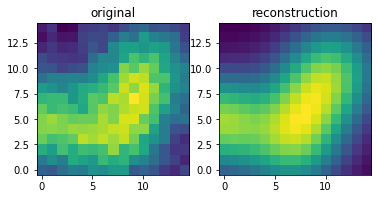

In [4]:
max_objects_smc = max_objects + 2
prior = CatalogPrior(max_objects_smc, img_width, img_height, background_intensity/3.)
smc = SMCsampler(images[0], image_attributes, prior, num_blocks = max_objects_smc+1, catalogs_per_block = 500, max_smc_iters = 1000)

print(f"True count: {true_counts[0]}")
print(f"True total flux: {true_fluxes[0].sum()}\n")

smc.run(print_progress = True)
smc.summarize()